<a href="https://colab.research.google.com/github/AkashBadhautiya/AIVirtualPainter/blob/master/24AI60R43_Assignment1__dependable_%26_secure_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Name: Akash Badhautiya**

#**Roll no: 24AI60R43**

#**Task 1: Single Pixel Expansion to Multiple Pixels**

Load a Grayscale Image:

Load a sample image (e.g., 512×512 Lena or any other sample image).

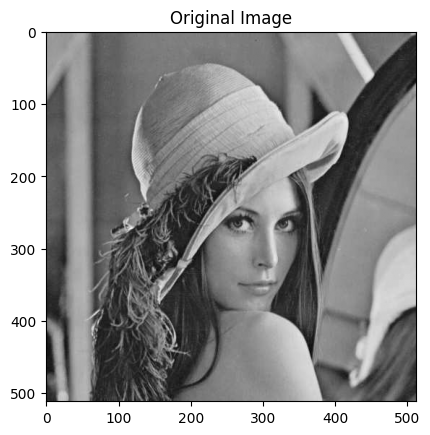

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()


Implement Pixel Expansion Function:

Functionality:

Takes an image and a scaling factor (e.g., 2×2, 3×3, 4×4).

Supports Constant Expansion, Gradient Expansion, and Random Expansion strategies.

<ipython-input-4-c217213db49e>:23: RuntimeWarning: overflow encountered in scalar add
  avg_pixel = (image[i, j] + right_pixel + down_pixel) / 3


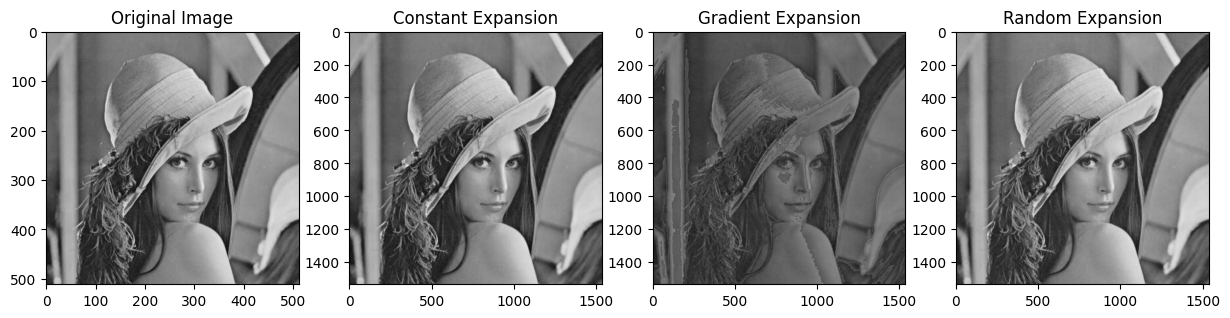

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

def expand_pixel(image, scale_factor, strategy='constant'):
    h, w = image.shape
    new_h, new_w = h * scale_factor, w * scale_factor
    expanded_image = np.zeros((new_h, new_w), dtype=np.uint8)

    for i in range(h):
        for j in range(w):
            if strategy == 'constant':
                # Each pixel expands into a block of same value
                block = np.full((scale_factor, scale_factor), image[i, j])

            elif strategy == 'gradient':
                # Creating a smooth gradient transition
                right_pixel = image[i, min(j + 1, w - 1)]
                down_pixel = image[min(i + 1, h - 1), j]
                avg_pixel = (image[i, j] + right_pixel + down_pixel) / 3
                block = np.linspace(image[i, j], avg_pixel, scale_factor)
                block = np.tile(block, (scale_factor, 1))

            elif strategy == 'random':
                # Each pixel expands into a block with random variations
                noise_range = 10  # Adjust noise range as needed
                block = np.clip(image[i, j] + np.random.randint(-noise_range, noise_range, (scale_factor, scale_factor)), 0, 255)

            # Assign block to new expanded image
            expanded_image[i * scale_factor:(i + 1) * scale_factor, j * scale_factor:(j + 1) * scale_factor] = block

    return expanded_image

# Testing all three strategies
scale_factor = 3  # Example scaling factor

constant_expanded = expand_pixel(image, scale_factor, strategy='constant')
gradient_expanded = expand_pixel(image, scale_factor, strategy='gradient')
random_expanded = expand_pixel(image, scale_factor, strategy='random')

# Display results
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(constant_expanded, cmap='gray')
axs[1].set_title('Constant Expansion')
axs[2].imshow(gradient_expanded, cmap='gray')
axs[2].set_title('Gradient Expansion')
axs[3].imshow(random_expanded, cmap='gray')
axs[3].set_title('Random Expansion')

plt.show()


#**Task 2: Adding Noise to an Image**

Select Noise Type: 1) Gaussian  2) Salt & Pepper  3) Poisson
Enter choice (1/2/3): 1
Enter Gaussian noise intensity (e.g., 10, 20, 30): 30


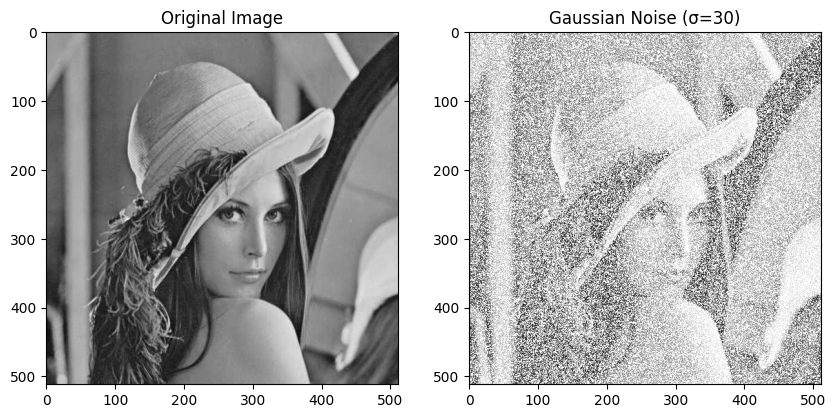

In [10]:
# Function to add Gaussian Noise
def add_gaussian_noise(image, mean=0, sigma=25):
    gaussian = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, gaussian)
    return noisy_image

# Function to add Salt & Pepper Noise
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy_image = np.copy(image)
    num_salt = np.ceil(salt_prob * image.size)
    num_pepper = np.ceil(pepper_prob * image.size)

    # Add salt (white) noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Add pepper (black) noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

# Function to add Poisson Noise
def add_poisson_noise(image):
    noisy_image = np.random.poisson(image).astype(np.uint8)
    return noisy_image

# User selects noise type and intensity
print("Select Noise Type: 1) Gaussian  2) Salt & Pepper  3) Poisson")
noise_type = input("Enter choice (1/2/3): ")

if noise_type == "1":
    sigma = int(input("Enter Gaussian noise intensity (e.g., 10, 20, 30): "))
    noisy_img = add_gaussian_noise(image, sigma=sigma)
    noise_name = f"Gaussian Noise (σ={sigma})"

elif noise_type == "2":
    salt_prob = float(input("Enter Salt probability (e.g., 0.01 to 0.05): "))
    pepper_prob = float(input("Enter Pepper probability (e.g., 0.01 to 0.05): "))
    noisy_img = add_salt_pepper_noise(image, salt_prob=salt_prob, pepper_prob=pepper_prob)
    noise_name = f"Salt & Pepper Noise (Salt={salt_prob}, Pepper={pepper_prob})"

elif noise_type == "3":
    noisy_img = add_poisson_noise(image)
    noise_name = "Poisson Noise"

else:
    print("Invalid choice! Defaulting to Gaussian Noise (σ=25)")
    noisy_img = add_gaussian_noise(image, sigma=25)
    noise_name = "Gaussian Noise (σ=25)"

# Display Original and Noisy Images Side by Side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(noisy_img, cmap='gray')
axs[1].set_title(noise_name)

plt.show()


#**Task 3: Evaluating Image Quality**

Gaussian Noise:
  - MSE: 9670.9951171875
  - PSNR: 8.27609203500062 dB
  - SSIM: 0.07036604297264124

Salt & Pepper Noise:
  - MSE: 732.8947143554688
  - PSNR: 19.48038744052633 dB
  - SSIM: 0.3928746448308812

Poisson Noise:
  - MSE: 135.7340545654297
  - PSNR: 26.803915657645184 dB
  - SSIM: 0.5826954137386251



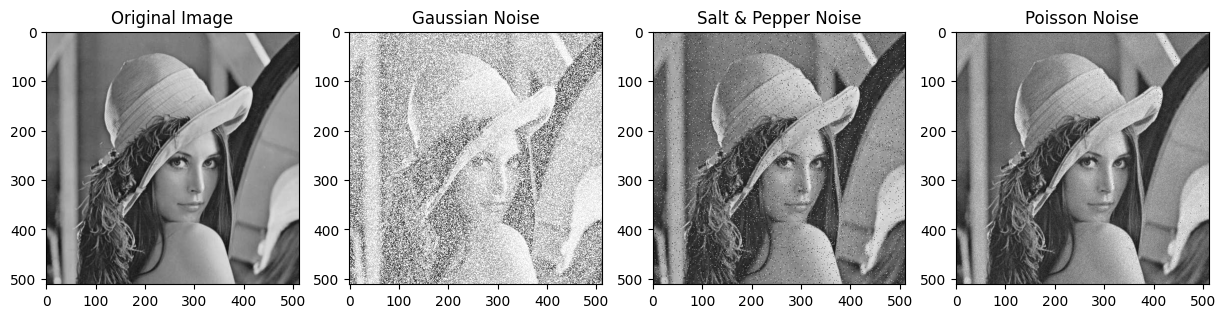

In [12]:
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Function to compute MSE
def compute_mse(imageA, imageB):
    return np.mean((imageA.astype(np.float32) - imageB.astype(np.float32)) ** 2)

# Function to compute PSNR
def compute_psnr(imageA, imageB):
    mse = compute_mse(imageA, imageB)
    if mse == 0:
        return float('inf')  # No difference, infinite PSNR
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to compute SSIM
def compute_ssim(imageA, imageB):
    return ssim(imageA, imageB, data_range=imageB.max() - imageB.min())

# Generate noisy images for evaluation
noisy_gaussian = add_gaussian_noise(image, sigma=25)
noisy_salt_pepper = add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)
noisy_poisson = add_poisson_noise(image)

# Compute quality metrics for each noise type
metrics = {}

for noise_type, noisy_img in zip(
    ["Gaussian", "Salt & Pepper", "Poisson"],
    [noisy_gaussian, noisy_salt_pepper, noisy_poisson]
):
    mse = compute_mse(image, noisy_img)
    psnr = compute_psnr(image, noisy_img)
    ssim_index = compute_ssim(image, noisy_img)

    metrics[noise_type] = {"MSE": mse, "PSNR": psnr, "SSIM": ssim_index}

# Display results
for noise_type, values in metrics.items():
    print(f"{noise_type} Noise:")
    print(f"  - MSE: {values['MSE']}")
    print(f"  - PSNR: {values['PSNR']} dB")
    print(f"  - SSIM: {values['SSIM']}\n")

# Display original and noisy images for comparison
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(noisy_gaussian, cmap='gray')
axs[1].set_title('Gaussian Noise')

axs[2].imshow(noisy_salt_pepper, cmap='gray')
axs[2].set_title('Salt & Pepper Noise')

axs[3].imshow(noisy_poisson, cmap='gray')
axs[3].set_title('Poisson Noise')

plt.show()


#**Bonus Task (Optional):**

Median Filter:
  - MSE: 9639.3076171875
  - PSNR: 8.29034505129918 dB
  - SSIM: 0.08775756899849049

Bilateral Filter:
  - MSE: 7946.11083984375
  - PSNR: 9.129257403270634 dB
  - SSIM: 0.19744802938059738

Non-Local Means:
  - MSE: 9683.7900390625
  - PSNR: 8.270349962346344 dB
  - SSIM: 0.08292940709592682



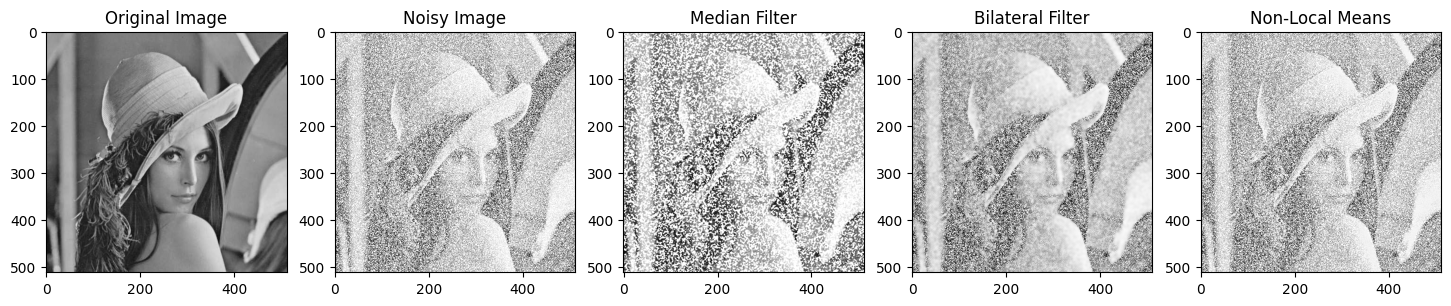

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Load grayscale image
image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Add noise (using Gaussian noise as an example)
noisy_image = add_gaussian_noise(image, sigma=25)

# Apply Denoising Techniques
denoised_median = cv2.medianBlur(noisy_image, 3)  # Median Filter
denoised_bilateral = cv2.bilateralFilter(noisy_image, 9, 75, 75)  # Bilateral Filter
denoised_nlm = cv2.fastNlMeansDenoising(noisy_image, h=10)  # Non-Local Means

# Compute quality metrics for denoised images
def evaluate_quality(original, denoised):
    mse = compute_mse(original, denoised)
    psnr = compute_psnr(original, denoised)
    ssim_index = compute_ssim(original, denoised)
    return mse, psnr, ssim_index

# Store results
denoise_metrics = {
    "Median Filter": evaluate_quality(image, denoised_median),
    "Bilateral Filter": evaluate_quality(image, denoised_bilateral),
    "Non-Local Means": evaluate_quality(image, denoised_nlm),
}

# Print quality metrics
for method, values in denoise_metrics.items():
    print(f"{method}:")
    print(f"  - MSE: {values[0]}")
    print(f"  - PSNR: {values[1]} dB")
    print(f"  - SSIM: {values[2]}\n")

# Display results
fig, axs = plt.subplots(1, 5, figsize=(18, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(noisy_image, cmap='gray')
axs[1].set_title('Noisy Image')

axs[2].imshow(denoised_median, cmap='gray')
axs[2].set_title('Median Filter')

axs[3].imshow(denoised_bilateral, cmap='gray')
axs[3].set_title('Bilateral Filter')

axs[4].imshow(denoised_nlm, cmap='gray')
axs[4].set_title('Non-Local Means')

plt.show()


#**CNN Layers: Filters, Activations, and Noise Impact**

#**Task 1: CNN Layer Anatomy & Filter Visualization**

Load a Pretrained CNN

In [15]:
import torch
import torchvision.models as models

# Load a pretrained CNN model (VGG16)
model = models.vgg16(pretrained=True)

# Display architecture
print("Model Architecture:\n", model)

# Display layer details
print("\nLayers in the Feature Extractor:\n")
for idx, layer in enumerate(model.features):
    print(f"Layer {idx}: {layer}")


Model Architecture:
 VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, 

Extract and Visualize Filters

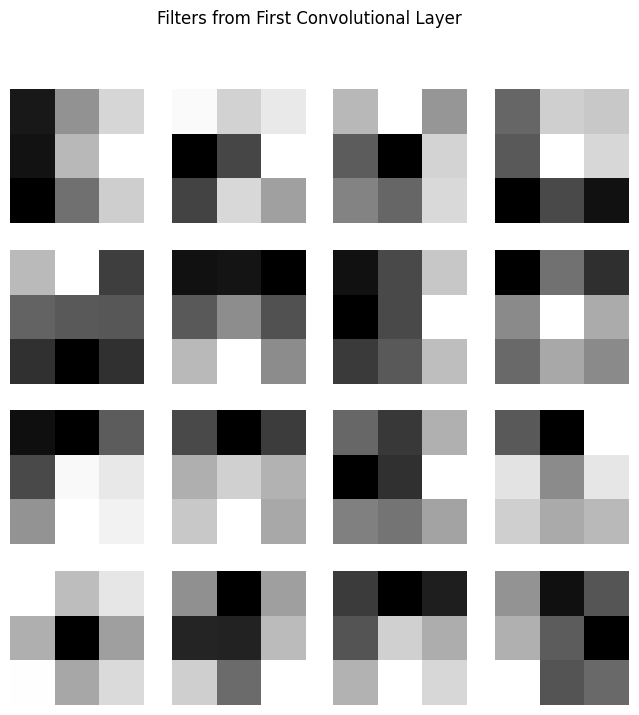

In [16]:
import matplotlib.pyplot as plt

# Extract filters from the first convolutional layer
filters = model.features[0].weight.data.clone()

# Normalize the filter values for better visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Visualize 16 filters from the first convolutional layer
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    if i < filters.shape[0]:  # Ensure index is within range
        ax.imshow(filters[i][0].cpu().numpy(), cmap='gray')
        ax.axis('off')

plt.suptitle("Filters from First Convolutional Layer")
plt.show()


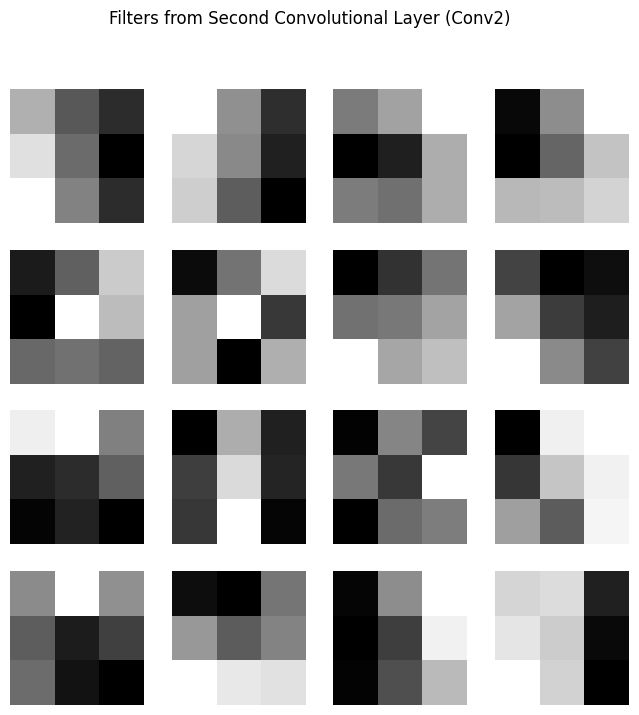

In [17]:
# Extract filters from the second convolutional layer (conv2)
filters_conv2 = model.features[2].weight.data.clone()  # Conv2

# Visualize 16 filters from the second convolutional layer
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    if i < filters_conv2.shape[0]:
        ax.imshow(filters_conv2[i][0].cpu().numpy(), cmap='gray')
        ax.axis('off')

plt.suptitle("Filters from Second Convolutional Layer (Conv2)")
plt.show()


Explanation:

Shallow filters (e.g., Conv1, Conv2): Detect simple patterns like
edges, corners, and gradients.

Deeper filters (Conv3, Conv4, etc.): Capture more complex textures, shapes, and patterns in the image.

Final layers: Extract high-level semantic information (e.g., objects, faces).

#**Task 2: Feature Map (Activation) Visualization**

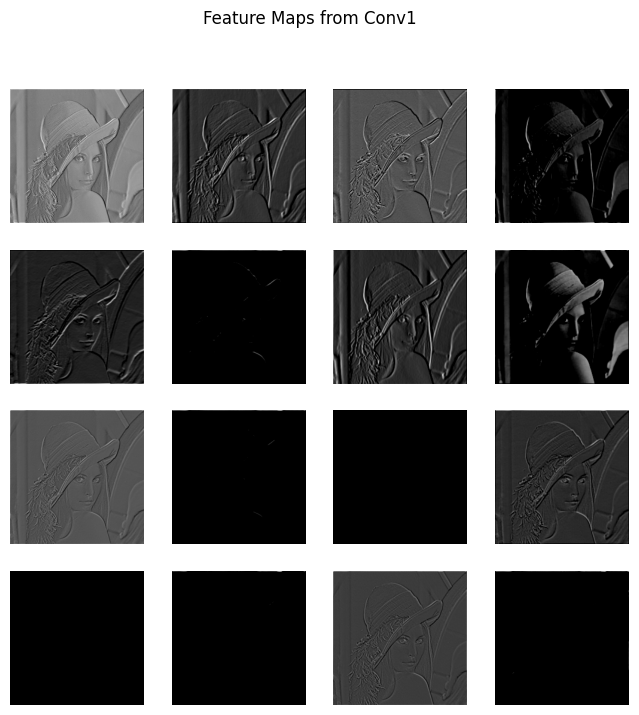

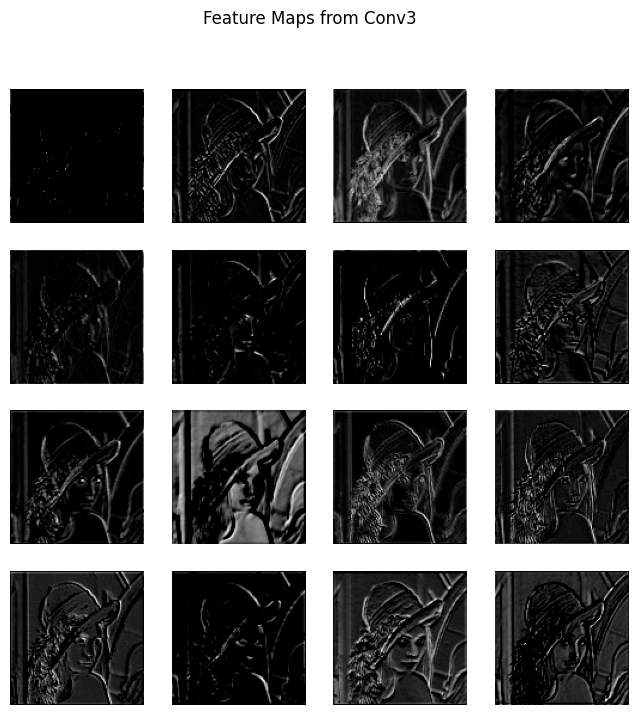

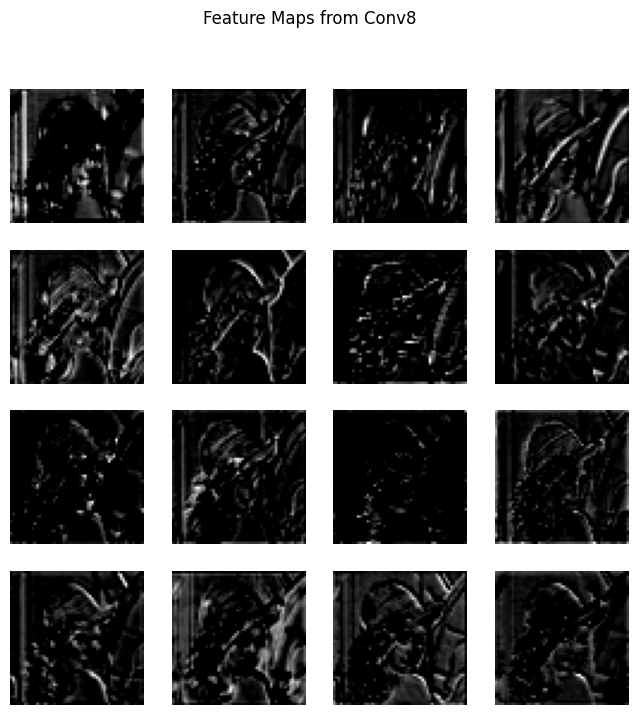

In [19]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load pretrained CNN model (VGG16)
model = models.vgg16(pretrained=True)
model.eval()  # Set to evaluation mode

# Load and preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

image_path = "lena.png"  # Ensure this image exists in the directory
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Pass image through the model and extract feature maps
def get_feature_maps(model, input_tensor, layer_indices):
    activations = []
    hooks = []

    def hook_fn(module, input, output):
        activations.append(output.detach())

    for idx in layer_indices:
        hooks.append(model.features[idx].register_forward_hook(hook_fn))

    with torch.no_grad():
        _ = model(input_tensor)

    for hook in hooks:
        hook.remove()  # Remove hooks after extraction

    return activations

# Define layer indices for different stages of the CNN (Conv1, Conv3, Conv8)
layer_indices = [0, 5, 10]  # Shallow, mid, and deep layers
feature_maps = get_feature_maps(model, input_tensor, layer_indices)

# Visualize feature maps from each layer
def visualize_feature_maps(feature_maps, layer_names):
    for fmap, layer in zip(feature_maps, layer_names):
        fmap = fmap.squeeze(0)  # Remove batch dimension
        num_filters = min(fmap.shape[0], 16)  # Show up to 16 filters

        fig, axes = plt.subplots(4, 4, figsize=(8, 8))
        for i, ax in enumerate(axes.flat):
            if i < num_filters:
                ax.imshow(fmap[i].cpu().numpy(), cmap='gray')
                ax.axis('off')
        plt.suptitle(f"Feature Maps from {layer}")
        plt.show()

layer_names = ["Conv1", "Conv3", "Conv8"]
visualize_feature_maps(feature_maps, layer_names)


Observations & Explanation:

#Shallow Layers (Conv1):

Detect basic edges, corners, and textures (horizontal, vertical, diagonal).

Filters act as edge detectors that highlight sharp intensity changes.

#Mid Layers (Conv3):

Detect more complex textures and shapes (e.g., patterns, repeated structures).

Begin capturing small features like eyes, fur, textures of objects.

#Deep Layers (Conv8):

Capture high-level semantic features like parts of objects, faces, or entire objects.

Feature maps appear more abstract and less interpretable to humans.

#**Task 3: Crafting Noise Images & Analyzing Impact on CNN**

Generate Noisy Images

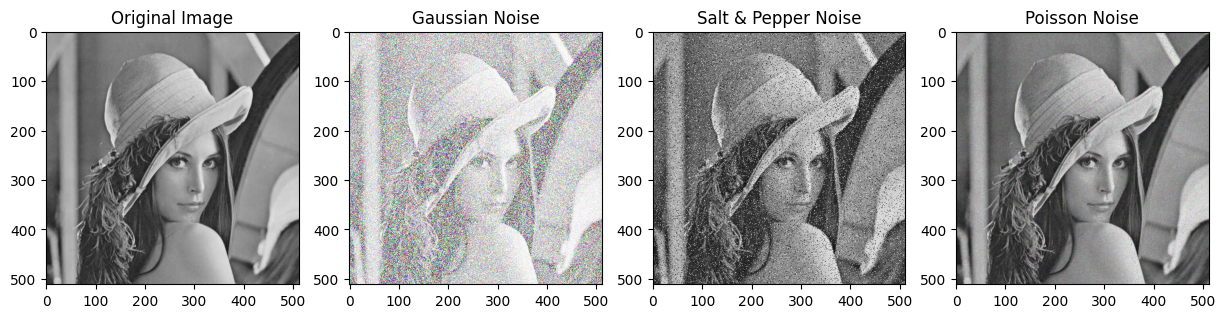

In [20]:
# Generate noisy images
noisy_gaussian = add_gaussian_noise(np.array(image), sigma=25)
noisy_salt_pepper = add_salt_pepper_noise(np.array(image), salt_prob=0.02, pepper_prob=0.02)
noisy_poisson = add_poisson_noise(np.array(image))

# Display noisy images
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(noisy_gaussian, cmap='gray')
axs[1].set_title('Gaussian Noise')

axs[2].imshow(noisy_salt_pepper, cmap='gray')
axs[2].set_title('Salt & Pepper Noise')

axs[3].imshow(noisy_poisson, cmap='gray')
axs[3].set_title('Poisson Noise')

plt.show()


Pass Noisy Images Through the CNN

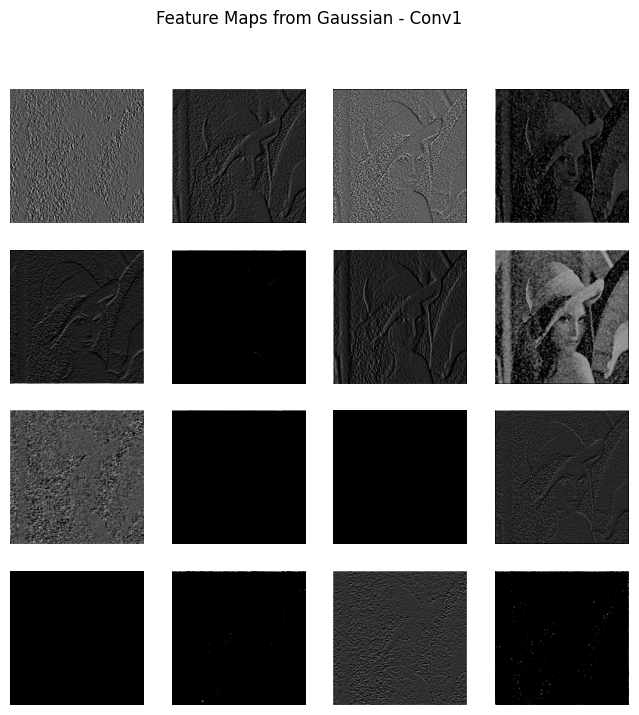

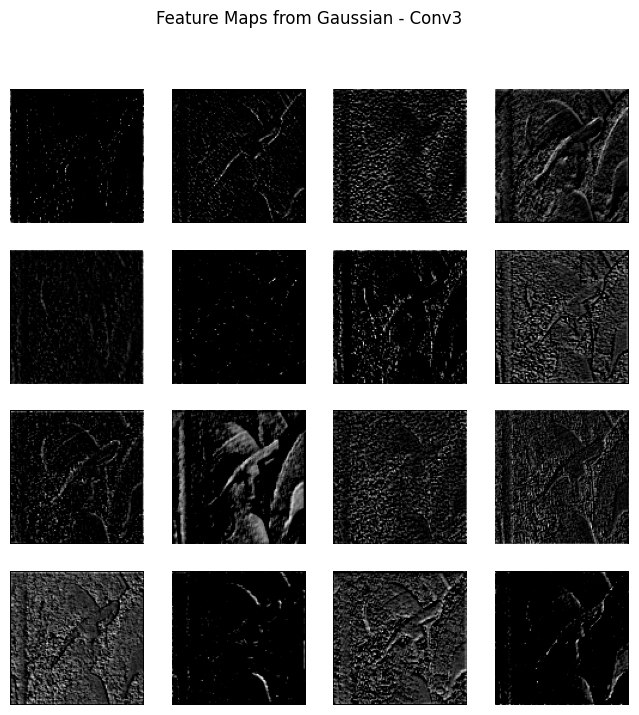

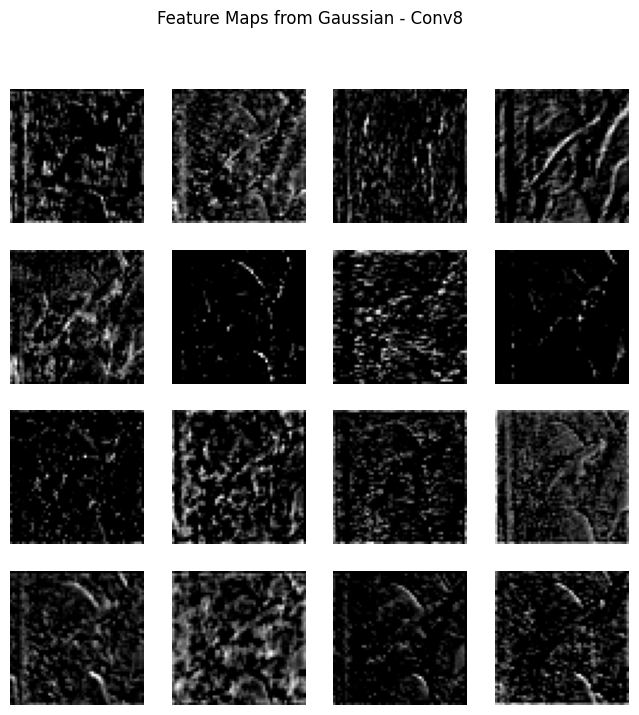

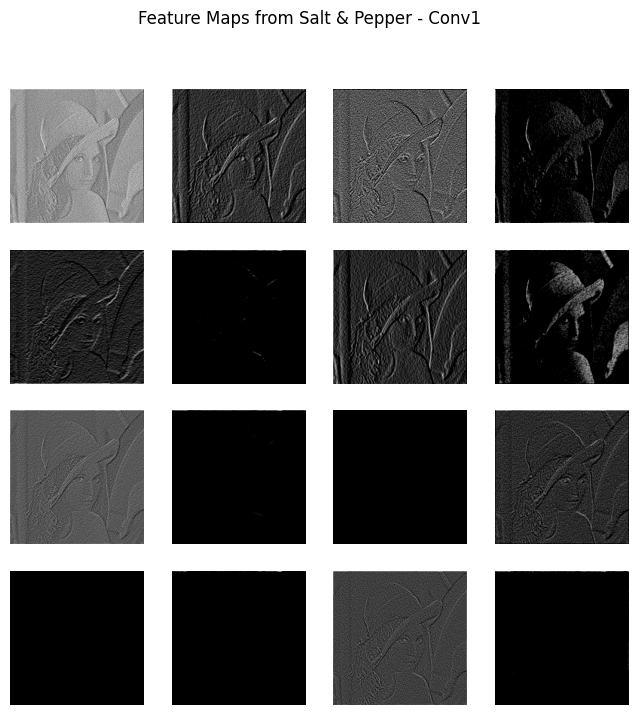

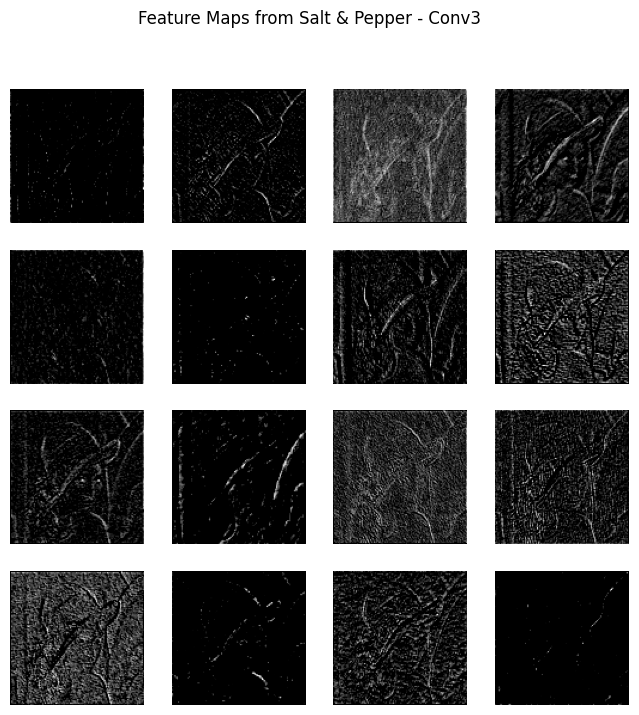

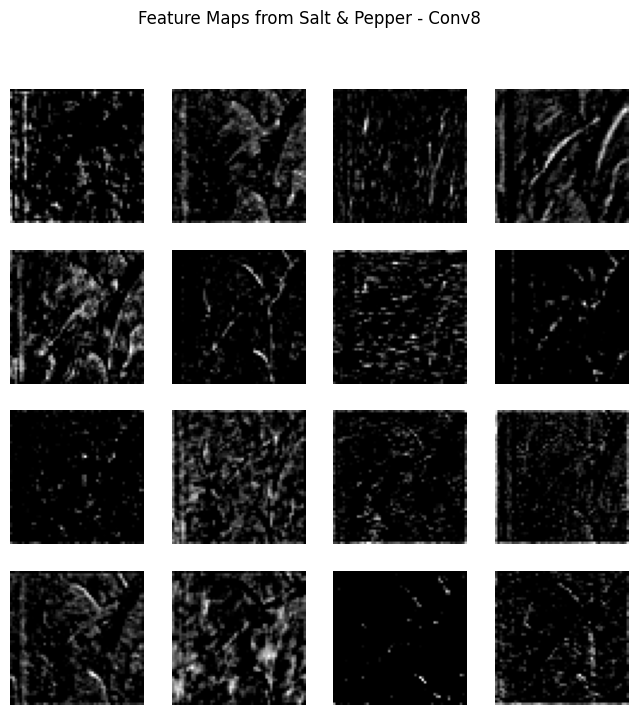

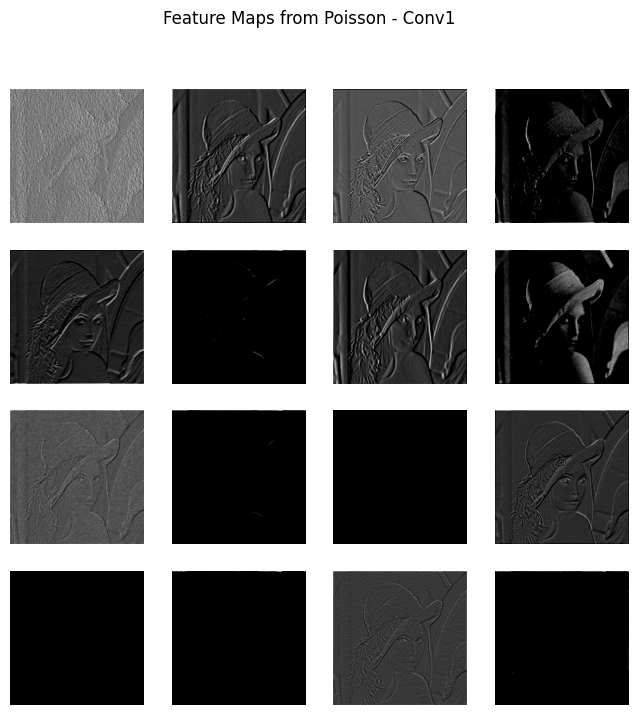

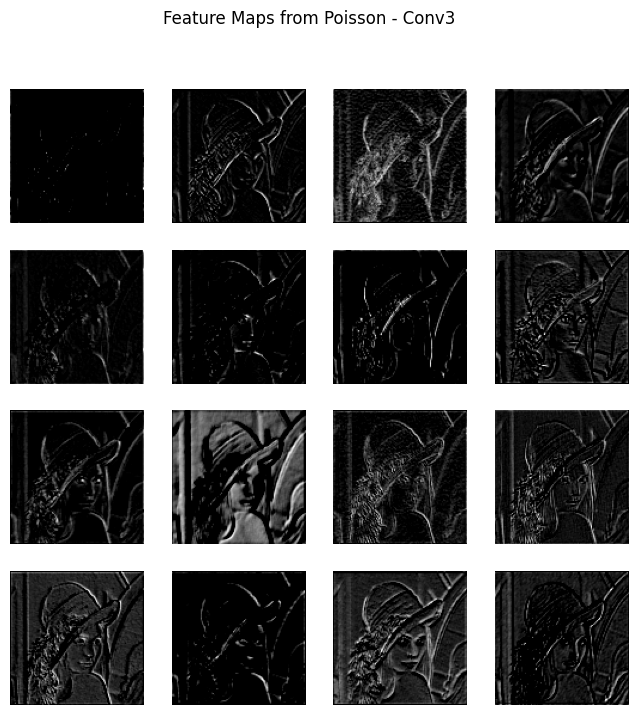

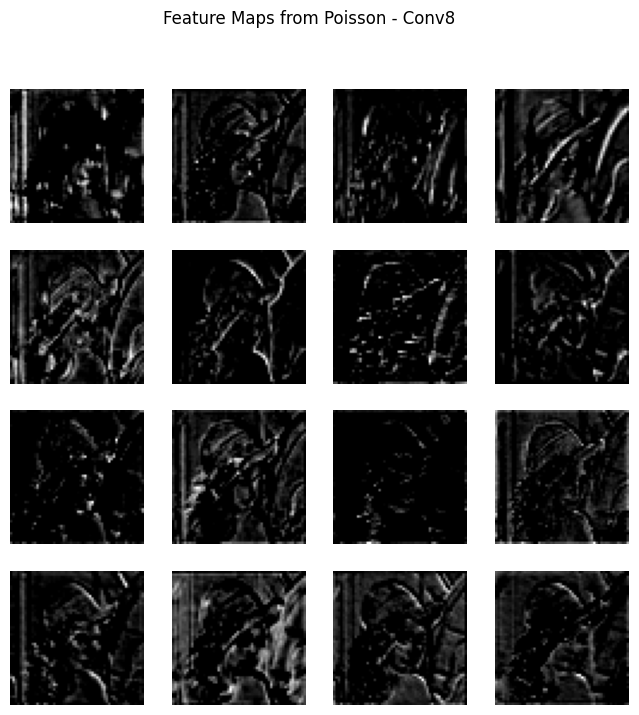

In [21]:
# Convert noisy images to tensors
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Convert images to tensors
noisy_gaussian_tensor = transform(Image.fromarray(noisy_gaussian)).unsqueeze(0)
noisy_salt_pepper_tensor = transform(Image.fromarray(noisy_salt_pepper)).unsqueeze(0)
noisy_poisson_tensor = transform(Image.fromarray(noisy_poisson)).unsqueeze(0)

# Extract feature maps for each noisy image
noisy_feature_maps = {}
for noise_type, img_tensor in zip(
    ["Gaussian", "Salt & Pepper", "Poisson"],
    [noisy_gaussian_tensor, noisy_salt_pepper_tensor, noisy_poisson_tensor]
):
    noisy_feature_maps[noise_type] = get_feature_maps(model, img_tensor, layer_indices)

# Visualize feature maps for noisy images
for noise_type, feature_map in noisy_feature_maps.items():
    visualize_feature_maps(feature_map, [f"{noise_type} - Conv1", f"{noise_type} - Conv3", f"{noise_type} - Conv8"])


Analyze Performance Drop

In [22]:
import torch.nn.functional as F

def get_classification_confidence(model, image_tensor):
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = F.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)
    return predicted_class.item(), confidence.item()

# Compute classification confidence for clean and noisy images
original_pred, original_conf = get_classification_confidence(model, input_tensor)
gaussian_pred, gaussian_conf = get_classification_confidence(model, noisy_gaussian_tensor)
salt_pepper_pred, salt_pepper_conf = get_classification_confidence(model, noisy_salt_pepper_tensor)
poisson_pred, poisson_conf = get_classification_confidence(model, noisy_poisson_tensor)

print(f"Original Image: Class {original_pred}, Confidence: {original_conf:.4f}")
print(f"Gaussian Noise: Class {gaussian_pred}, Confidence: {gaussian_conf:.4f}")
print(f"Salt & Pepper Noise: Class {salt_pepper_pred}, Confidence: {salt_pepper_conf:.4f}")
print(f"Poisson Noise: Class {poisson_pred}, Confidence: {poisson_conf:.4f}")


Original Image: Class 452, Confidence: 0.3620
Gaussian Noise: Class 669, Confidence: 0.6903
Salt & Pepper Noise: Class 669, Confidence: 0.7785
Poisson Noise: Class 452, Confidence: 0.4972
